# Pytorch with the MNIST Dataset - MINST

In [1]:
## import libraries
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [2]:
print(torch.__version__)

2.2.1+cu121


In [3]:
args={}
kwargs={}
args['batch_size']=32
args['test_batch_size']=32
args['epochs']=1  #The number of Epochs is the number of times you go through the full dataset.
args['lr']=0.01 #Learning rate is how fast it will decend.
args['momentum']=0.5 #SGD momentum (default: 0.5) Momentum is a moving average of our gradients (helps to keep direction).

args['seed']=1 #random seed
args['log_interval']=10
args['cuda']=True #if the computer has a GPU, type True, otherwise, False

This code is adopted from the pytorch examples repository. It is licensed under BSD 3-Clause "New" or "Revised" License. Source: https://github.com/pytorch/examples/ LICENSE: https://github.com/pytorch/examples/blob/master/LICENSE

## Load Dataset
The first step before training the model is to import the data. We will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) which is like the Hello World dataset of machine learning.

Besides importing the data, we will also do a few more things:
- We will tranform the data into tensors using the `transforms` module
- We will use `DataLoader` to build convenient data loaders or what are referred to as iterators, which makes it easy to efficiently feed data in batches to deep learning models.
- As hinted above, we will also create batches of the data by setting the `batch` parameter inside the data loader. Notice we use batches of `32` in this tutorial but you can change it to `64` if you like. I encourage you to experiment with different batches.

In [4]:
## transformations
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])

## download and load training dataset
trainset = datasets.MNIST(root='../data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=args['batch_size'], shuffle=True, **kwargs)

## download and load testing dataset
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=args['test_batch_size'], shuffle=True, **kwargs)

100%|██████████| 9912422/9912422 [00:00<00:00, 102611991.99it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 101114936.41it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31067298.85it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19885729.40it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 9912422/9912422 [00:00<00:00, 116387177.74it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 22553657.39it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31136674.85it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19379988.57it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Exploring the Data
As a practioner and researcher, I am always spending a bit of time and effort exploring and understanding the dataset. It's fun and this is a good practise to ensure that everything is in order.

Let's check what the train and test dataset contains. I will use `matplotlib` to print out some of the images from our dataset.

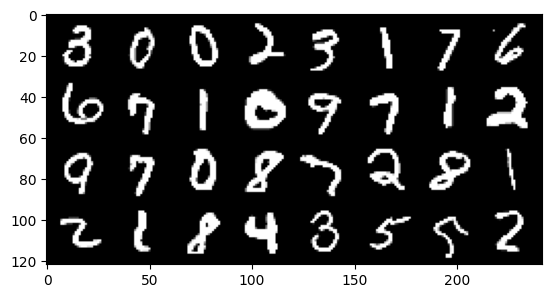

In [5]:
import matplotlib.pyplot as plt
import numpy as np

## functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

## get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

## show images
imshow(torchvision.utils.make_grid(images))

Let's check the dimensions of a batch.

In [6]:
for images, labels in train_loader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

Image batch dimensions: torch.Size([32, 1, 28, 28])
Image label dimensions: torch.Size([32])


## The Model
We provide two fully-connected neural net as the initial architecture.

Here are a few notes for those who are beginning with PyTorch:
- The model below consists of an `__init__()` portion which is where you include the layers and components of the neural network. In our model, we have two fully-connected netork network. We are dealing with an image dataset that is in a grayscale so we only need one channel going in, hence `in_channels=1`.

- After the first layer, we also apply an activation function such as `ReLU`. For prediction purposes, we then apply a `softmax` layer to the last transformation and return the output of that.  

In [20]:
class Net(nn.Module):
    #This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x=x.view(-1,784)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        #Softmax gets probabilities.
        return F.log_softmax(x, dim=1)


**Now, add one CNN layer with a pooling to the above neural network and rerun the code to see whether you get higher prediction accuracy on the test set.**

For example, you may try `out_channels=32`. Kernel size is 5, and for the rest of parameters we use the default values which you can find [here](https://pytorch.org/docs/stable/nn.html?highlight=conv2d#conv2d).

- In short, the convolutional layer transforms the input data into a specific dimension that has to be considered in the linear layer.

Make sure your flatten the output of CNN layer excluding # of batch so that the input of each example/batch has the same size of the first neural net.

Tips: You can use x.view(-1, # of input size of the first fully-connected layer) or you can use torch.flatten(x, 1).

I always encourage to test the model with 1 batch to ensure that the output dimensions are what we expect.

In [21]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.no_filter = 32
        # Define the CNN layer with 1 input channel, 32 output channels, and kernel size 5x5
        self.conv1 = nn.Conv2d(1, self.no_filter, kernel_size=5)
        # Define the max pooling layer with kernel size 2x2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Define the first fully connected layer with input size determined by the output size of the CNN layer
        self.fc1 = nn.Linear(32 * 12 * 12, 256)  # 12x12 output size after applying 2x2 max pooling twice
        # Define the second fully connected layer with input size 256 and output size 10
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        # Apply the convolutional layer followed by ReLU activation and max pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Flatten the output of the CNN layer
        x = x.view(-1, 32 * 12 * 12)
        # Apply the first fully connected layer followed by ReLU activation
        x = F.relu(self.fc1(x))
        # Apply the second fully connected layer
        x = self.fc2(x)
        # Apply log softmax to get probabilities
        return F.log_softmax(x, dim=1)

In [22]:
## test the model with 1 batch
model = Net()
#print(model)
for images, labels in train_loader:
    print("batch size:", args['batch_size'])
    out = model(images)
    print(out.shape)
    break

batch size: 32
torch.Size([64, 10])


## Training the Model
Now we are ready to train the model.

In [23]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if args['cuda']:
            data, target = data.cuda(), target.cuda()
        #Variables in Pytorch are differenciable.
        data, target = Variable(data), Variable(target)
        #This will zero out the gradients for this batch.
        optimizer.zero_grad()
        output = model(data)
        # Calculate the loss The negative log likelihood loss. It is useful to train a classification problem with C classes.
        loss = F.nll_loss(output, target)
        #dloss/dx for every Variable
        loss.backward()
        #to do a one-step update on our parameter.
        optimizer.step()
        #Print out the loss periodically.
        if batch_idx % args['log_interval'] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

In [24]:
def test():
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
      for data, target in test_loader:
          if args['cuda']:
              data, target = data.cuda(), target.cuda()
          data, target = Variable(data), Variable(target)
          output = model(data)
          test_loss += F.nll_loss(output, target, size_average=False).data.item() # sum up batch loss
          pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
          correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [25]:
model = Net()
if args['cuda']:
    model.cuda()

optimizer = optim.SGD(model.parameters(), lr=args['lr'], momentum=args['momentum'])

for epoch in range(1, args['epochs'] + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/2000 (0%)]	Loss: 2.297055
Train Epoch: 1 [640/2000 (31%)]	Loss: 2.253675
Train Epoch: 1 [1280/2000 (62%)]	Loss: 2.175015
Train Epoch: 1 [1920/2000 (94%)]	Loss: 2.102211


/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 1.6749, Accuracy: 6666/10000 (67%)



In [11]:
class Net(nn.Module):
    # This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        # Softmax gets probabilities.
        return F.log_softmax(x, dim=1)

# Number of data points for training and validation
train_size = 2000
val_size = 100
epochs = 12

# Load MNIST dataset
mnist_train = MNIST(root='./data', train=True, download=True, transform=ToTensor())
mnist_val = MNIST(root='./data', train=False, download=True, transform=ToTensor())

# Create indices for data sampling
train_indices = torch.randperm(len(mnist_train)).tolist()[:train_size]
val_indices = torch.randperm(len(mnist_val)).tolist()[:val_size]

# Create subset datasets
train_subset = Subset(mnist_train, train_indices)
val_subset = Subset(mnist_val, val_indices)

# Define batch sizes and learning rates to iterate over
batch_sizes = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]

# Training loop for different combinations of batch sizes and learning rates
for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        # Create data loaders
        train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

        # Initialize model and optimizer
        model = Net()
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

        # Training loop
        for epoch in range(epochs):
            model.train()
            for batch_idx, (data, target) in enumerate(train_loader):
                optimizer.zero_grad()
                output = model(data)
                loss = F.nll_loss(output, target)
                loss.backward()
                optimizer.step()

        # Validation loop
        model.eval()
        val_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in val_loader:
                output = model(data)
                val_loss += F.nll_loss(output, target, reduction='sum').item()
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()

        val_loss /= len(val_loader.dataset)
        accuracy = correct / len(val_loader.dataset)

        print(f'Batch Size: {batch_size}, Learning Rate: {learning_rate}, Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}')

Batch Size: 32, Learning Rate: 0.001, Validation Loss: 0.5848, Accuracy: 0.9000
Batch Size: 32, Learning Rate: 0.01, Validation Loss: 0.7800, Accuracy: 0.8900
Batch Size: 32, Learning Rate: 0.1, Validation Loss: 1.7047, Accuracy: 0.6200
Batch Size: 64, Learning Rate: 0.001, Validation Loss: 0.5919, Accuracy: 0.8900
Batch Size: 64, Learning Rate: 0.01, Validation Loss: 0.5861, Accuracy: 0.9100
Batch Size: 64, Learning Rate: 0.1, Validation Loss: 1.2183, Accuracy: 0.8000
Batch Size: 128, Learning Rate: 0.001, Validation Loss: 0.5367, Accuracy: 0.9000
Batch Size: 128, Learning Rate: 0.01, Validation Loss: 0.6271, Accuracy: 0.9100
Batch Size: 128, Learning Rate: 0.1, Validation Loss: 0.9211, Accuracy: 0.8500


In [12]:
  class Net(nn.Module):
    # This defines the structure of the NN.
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        # Softmax gets probabilities.
        return F.log_softmax(x, dim=1)

# Number of data points for training and validation
train_size = 2000
val_size = 100
epochs = 12

# Load MNIST dataset
mnist_train = MNIST(root='./data', train=True, download=True, transform=ToTensor())
mnist_val = MNIST(root='./data', train=False, download=True, transform=ToTensor())

# Create indices for data sampling
train_indices = torch.randperm(len(mnist_train)).tolist()[:train_size]
val_indices = torch.randperm(len(mnist_val)).tolist()[:val_size]

# Create subset datasets and data loaders
train_subset = Subset(mnist_train, train_indices)
val_subset = Subset(mnist_val, val_indices)

train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=64, shuffle=False)

# Define a list of activation functions and learning rates to try
activation_functions = [F.relu, F.sigmoid, F.tanh]
learning_rates = [0.001, 0.01, 0.1]

# Loop over activation functions and learning rates
for activation_fn in activation_functions:
    for lr in learning_rates:
        print(f"\nTraining with activation function: {activation_fn.__name__}, Learning rate: {lr}")

        # Initialize the model and optimizer
        model = Net()
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)

        # Training loop
        for epoch in range(epochs):
            model.train()
            for batch_idx, (data, target) in enumerate(train_loader):
                optimizer.zero_grad()
                output = model(data)
                loss = F.nll_loss(output, target)
                loss.backward()
                optimizer.step()

        # Validation loop
        model.eval()
        val_loss = 0
        correct = 0
        with torch.no_grad():
            for data, target in val_loader:
                output = model(data)
                val_loss += F.nll_loss(output, target, reduction='sum').item()
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()

        val_loss /= len(val_loader.dataset)
        accuracy = correct / len(val_loader.dataset)

        print(f'Validation set: Average loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}')


Training with activation function: relu, Learning rate: 0.001
Validation set: Average loss: 0.5206, Accuracy: 0.8400

Training with activation function: relu, Learning rate: 0.01
Validation set: Average loss: 0.5577, Accuracy: 0.8900

Training with activation function: relu, Learning rate: 0.1
Validation set: Average loss: 0.9382, Accuracy: 0.7700

Training with activation function: sigmoid, Learning rate: 0.001
Validation set: Average loss: 0.4840, Accuracy: 0.8500

Training with activation function: sigmoid, Learning rate: 0.01
Validation set: Average loss: 0.6696, Accuracy: 0.8900

Training with activation function: sigmoid, Learning rate: 0.1
Validation set: Average loss: 1.2849, Accuracy: 0.7100

Training with activation function: tanh, Learning rate: 0.001
Validation set: Average loss: 0.4376, Accuracy: 0.8500

Training with activation function: tanh, Learning rate: 0.01
Validation set: Average loss: 0.6646, Accuracy: 0.8600

Training with activation function: tanh, Learning rat

In [13]:
import pandas as pd
from tabulate import tabulate

# Results data
results = [
    {"Batch Size": 32, "Learning Rate": 0.001, "Validation Loss": 0.5848, "Accuracy": 0.9000},
    {"Batch Size": 32, "Learning Rate": 0.01, "Validation Loss": 0.7800, "Accuracy": 0.8900},
    {"Batch Size": 32, "Learning Rate": 0.1, "Validation Loss": 1.7047, "Accuracy": 0.6200},
    {"Batch Size": 64, "Learning Rate": 0.001, "Validation Loss": 0.5919, "Accuracy": 0.8900},
    {"Batch Size": 64, "Learning Rate": 0.01, "Validation Loss": 0.5861, "Accuracy": 0.9100},
    {"Batch Size": 64, "Learning Rate": 0.1, "Validation Loss": 1.2183, "Accuracy": 0.8000},
    {"Batch Size": 128, "Learning Rate": 0.001, "Validation Loss": 0.5367, "Accuracy": 0.9000},
    {"Batch Size": 128, "Learning Rate": 0.01, "Validation Loss": 0.6271, "Accuracy": 0.9100},
    {"Batch Size": 128, "Learning Rate": 0.1, "Validation Loss": 0.9211, "Accuracy": 0.8500}
]

# Convert data to DataFrame
df = pd.DataFrame(results)

# Display as table
print(tabulate(df, headers='keys', tablefmt='psql'))


+----+--------------+-----------------+-------------------+------------+
|    |   Batch Size |   Learning Rate |   Validation Loss |   Accuracy |
|----+--------------+-----------------+-------------------+------------|
|  0 |           32 |           0.001 |            0.5848 |       0.9  |
|  1 |           32 |           0.01  |            0.78   |       0.89 |
|  2 |           32 |           0.1   |            1.7047 |       0.62 |
|  3 |           64 |           0.001 |            0.5919 |       0.89 |
|  4 |           64 |           0.01  |            0.5861 |       0.91 |
|  5 |           64 |           0.1   |            1.2183 |       0.8  |
|  6 |          128 |           0.001 |            0.5367 |       0.9  |
|  7 |          128 |           0.01  |            0.6271 |       0.91 |
|  8 |          128 |           0.1   |            0.9211 |       0.85 |
+----+--------------+-----------------+-------------------+------------+


In [18]:
from tabulate import tabulate

# Results data
results = [
    {"Activation Function": "relu", "Learning Rate": 0.001, "Validation Loss": 0.5206, "Accuracy": 0.8400},
    {"Activation Function": "relu", "Learning Rate": 0.01, "Validation Loss": 0.5577, "Accuracy": 0.8900},
    {"Activation Function": "relu", "Learning Rate": 0.1, "Validation Loss": 0.9382, "Accuracy": 0.7700},
    {"Activation Function": "sigmoid", "Learning Rate": 0.001, "Validation Loss": 0.4840, "Accuracy": 0.8500},
    {"Activation Function": "sigmoid", "Learning Rate": 0.01, "Validation Loss": 0.6696, "Accuracy": 0.8900},
    {"Activation Function": "sigmoid", "Learning Rate": 0.1, "Validation Loss": 1.2849, "Accuracy": 0.7100},
    {"Activation Function": "tanh", "Learning Rate": 0.001, "Validation Loss": 0.4376, "Accuracy": 0.8500},
    {"Activation Function": "tanh", "Learning Rate": 0.01, "Validation Loss": 0.6646, "Accuracy": 0.8600},
    {"Activation Function": "tanh", "Learning Rate": 0.1, "Validation Loss": 1.1164, "Accuracy": 0.7500}
]

# Sort the results for each activation layer by Accuracy in descending order and highlight the best accuracy in red
sorted_results = []
activation_functions = set([result["Activation Function"] for result in results])

for activation_fn in activation_functions:
    activation_results = [result for result in results if result["Activation Function"] == activation_fn]
    sorted_activation_results = sorted(activation_results, key=lambda x: x['Accuracy'], reverse=True)
    best_accuracy = sorted_activation_results[0]['Accuracy']
    for result in sorted_activation_results:
        if result['Accuracy'] == best_accuracy:
            result['Accuracy'] = f"\033[91m{result['Accuracy']:.4f}\033[0m"  # Highlight the best accuracy in red
    sorted_results.extend(sorted_activation_results)
    sorted_results.append({'Activation Function': '\033[93m---------\033[0m'})  # Yellow separating line

# Display as table
print(tabulate(sorted_results, headers='keys', tablefmt='psql', showindex=False))

+-----------------------+-----------------+-------------------+------------+
| Activation Function   |   Learning Rate |   Validation Loss |   Accuracy |
|-----------------------+-----------------+-------------------+------------|
| sigmoid               |           0.01  |            0.6696 |       0.89 |
| sigmoid               |           0.001 |            0.484  |       0.85 |
| sigmoid               |           0.1   |            1.2849 |       0.71 |
| ---------             |                 |                   |            |
| tanh                  |           0.01  |            0.6646 |       0.86 |
| tanh                  |           0.001 |            0.4376 |       0.85 |
| tanh                  |           0.1   |            1.1164 |       0.75 |
| ---------             |                 |                   |            |
| relu                  |           0.01  |            0.5577 |       0.89 |
| relu                  |           0.001 |            0.5206 |       0.84 |

In [19]:
from tabulate import tabulate

# Results data
results = [
    {"Batch Size": 32, "Learning Rate": 0.001, "Validation Loss": 0.5848, "Accuracy": 0.9000},
    {"Batch Size": 32, "Learning Rate": 0.01, "Validation Loss": 0.7800, "Accuracy": 0.8900},
    {"Batch Size": 32, "Learning Rate": 0.1, "Validation Loss": 1.7047, "Accuracy": 0.6200},
    {"Batch Size": 64, "Learning Rate": 0.001, "Validation Loss": 0.5919, "Accuracy": 0.8900},
    {"Batch Size": 64, "Learning Rate": 0.01, "Validation Loss": 0.5861, "Accuracy": 0.9100},
    {"Batch Size": 64, "Learning Rate": 0.1, "Validation Loss": 1.2183, "Accuracy": 0.8000},
    {"Batch Size": 128, "Learning Rate": 0.001, "Validation Loss": 0.5367, "Accuracy": 0.9000},
    {"Batch Size": 128, "Learning Rate": 0.01, "Validation Loss": 0.6271, "Accuracy": 0.9100},
    {"Batch Size": 128, "Learning Rate": 0.1, "Validation Loss": 0.9211, "Accuracy": 0.8500}
]

# Sort the results for each batch size by Accuracy in descending order and highlight the best accuracy in red
sorted_results = []
batch_sizes = set([result["Batch Size"] for result in results])

for batch_size in batch_sizes:
    batch_size_results = [result for result in results if result["Batch Size"] == batch_size]
    sorted_batch_size_results = sorted(batch_size_results, key=lambda x: x['Accuracy'], reverse=True)
    best_accuracy = sorted_batch_size_results[0]['Accuracy']
    for result in sorted_batch_size_results:
        if result['Accuracy'] == best_accuracy:
            result['Accuracy'] = f"\033[91m{result['Accuracy']:.4f}\033[0m"  # Highlight the best accuracy in red
    sorted_results.extend(sorted_batch_size_results)
    sorted_results.append({'Batch Size': '\033[93m---------\033[0m'})  # Yellow separating line

# Display as table
print(tabulate(sorted_results, headers='keys', tablefmt='psql', showindex=False))

+--------------+-----------------+-------------------+------------+
| Batch Size   |   Learning Rate |   Validation Loss |   Accuracy |
|--------------+-----------------+-------------------+------------|
| 32           |           0.001 |            0.5848 |       0.9  |
| 32           |           0.01  |            0.78   |       0.89 |
| 32           |           0.1   |            1.7047 |       0.62 |
| ---------    |                 |                   |            |
| 64           |           0.01  |            0.5861 |       0.91 |
| 64           |           0.001 |            0.5919 |       0.89 |
| 64           |           0.1   |            1.2183 |       0.8  |
| ---------    |                 |                   |            |
| 128          |           0.01  |            0.6271 |       0.91 |
| 128          |           0.001 |            0.5367 |       0.9  |
| 128          |           0.1   |            0.9211 |       0.85 |
| ---------    |                 |              